# Heart Disease Prediction Project

. 1-Problem Definition

. 2-Data

. 3-Evaluate

. 4-Feature

. 5-Modelling

. 6-Experimentation

### 1-Problem Definition
Based on the given we need to prrdict if a patient has heart disease or not

### 2-Data
The data is loaded

### 3 Evaluate
In initial stages we need to make sure, If our model gives us the accuracy of accuracy of 95%

### 4. Features
Features of dataset are

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



## Importing Tools and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc


## Exploring the Data Initial Stage
1-What problem i am going to solve

2-What kind of data I have

3-Does this data have missing values

4-Are ther any outliers, sporious vectors

5-Can we add or remove some of the features

In [3]:
df = pd.read_csv('../Datasets/heart_disease_data.csv')
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

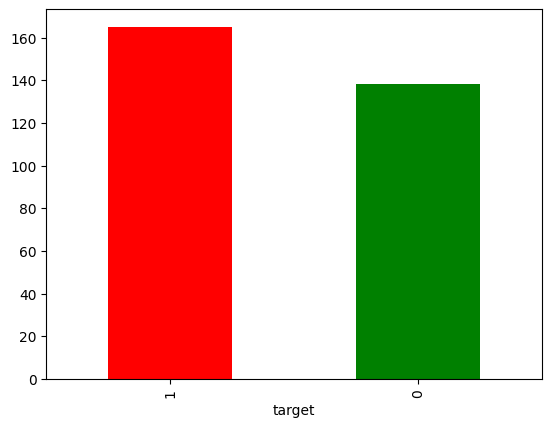

In [7]:
df['target'].value_counts().plot(kind='bar', color=['red','green']);

In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Checking Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
len(df)

303

In [12]:
# checking how many male and female have disease
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
# Male patient in percent
72/96

0.75

In [14]:
# Female patient in percent
93/207

0.4492753623188406

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

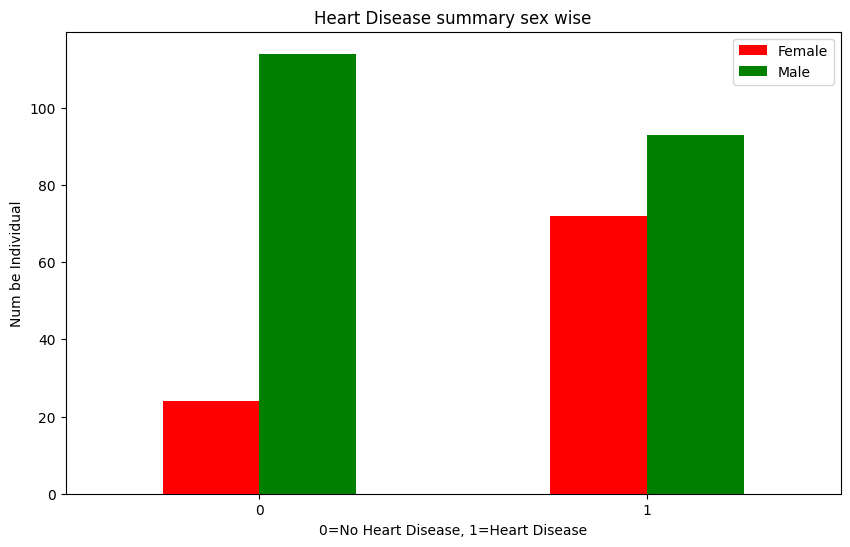

In [15]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

## Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

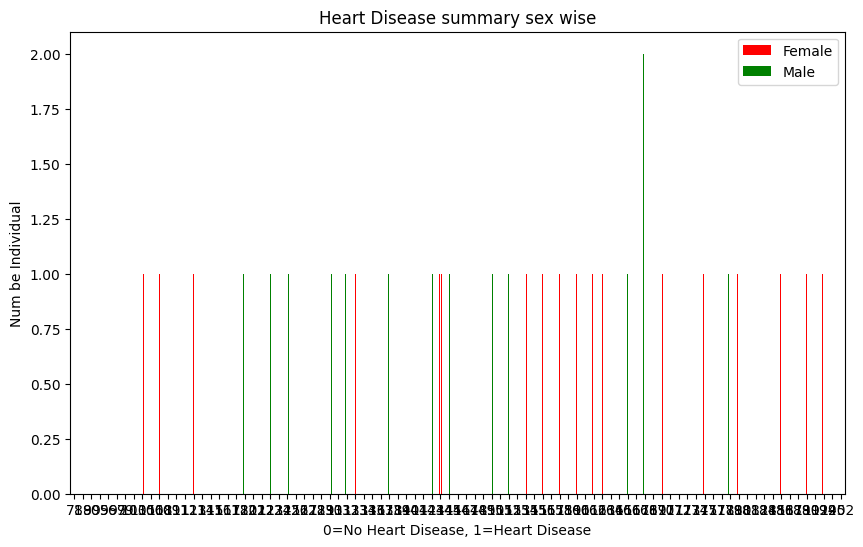

In [16]:
# thalach = maximum heart rate
# Finding patterns in Data using Scatter Plot
pd.crosstab(df.thalach,df.age).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Female','Male'])
plt.xticks(rotation=0) #;

In [17]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

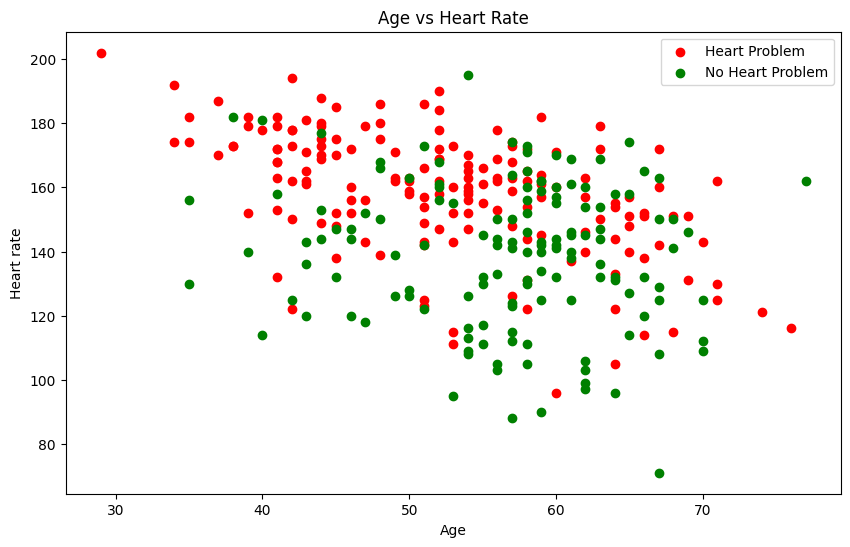

In [18]:
# Finding Patterns in Data Using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
# plt.scatter(df.age,df.thalach,c='green'); # for total data
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red'); # for those who have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green'); # for those who have not heart disease
# doing makeup hahahahahah
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Heart Problem','No Heart Problem']);

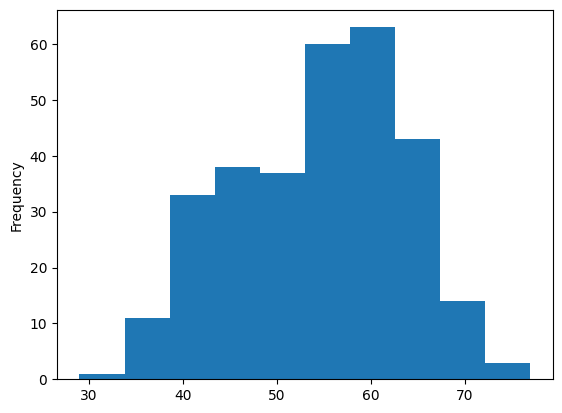

In [19]:
# histogram plot from guasian distribution collect random sample result is down from perfect guasion distribution i.e Skewed histogram not only tell how much you deviate from perfect gausian distribution but all tell how many outliers presents

# Create histogram to see age Distribution
df.age.plot.hist();

## Chest pain type and target relation part 1

In [20]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

    - Value 0: typical angina: chest pain due to decrease blood pressure.
    
    - Value 1: atypical angina: Cheast pain not related to Heart Problem
    
    - Value 2: non-anginal pain: Not Heart Related
    
    - Value 3: asymptomatic: chest pain not showing Heart Problem

In [21]:
# cross always between two tab(columns)
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


## Chest pain type and target relation part 2

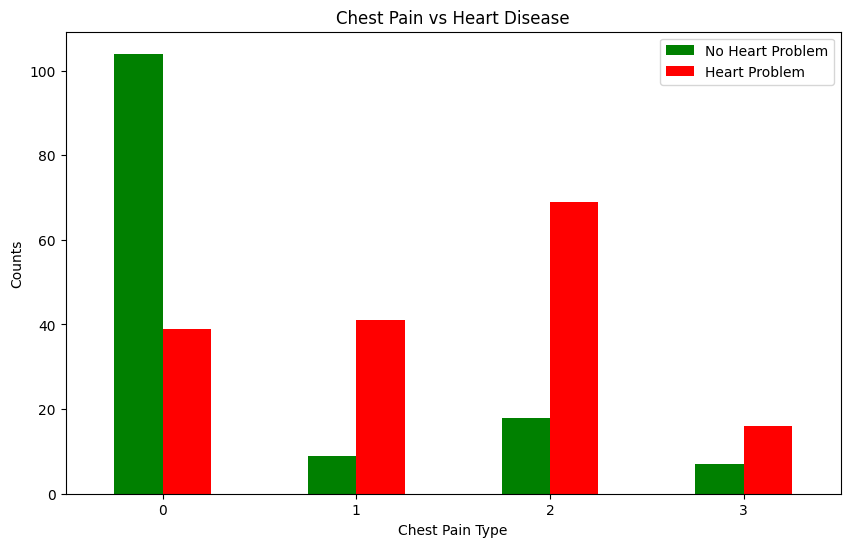

In [22]:
# Making the bar chat of chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind='bar',
                              figsize=(10,6),
                              color=['green','red'])
# Make some discription of the chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart Problem','Heart Problem']);
plt.xticks(rotation=0);

## Correlation Matrix Part 1

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Correlation Matrix Part 2

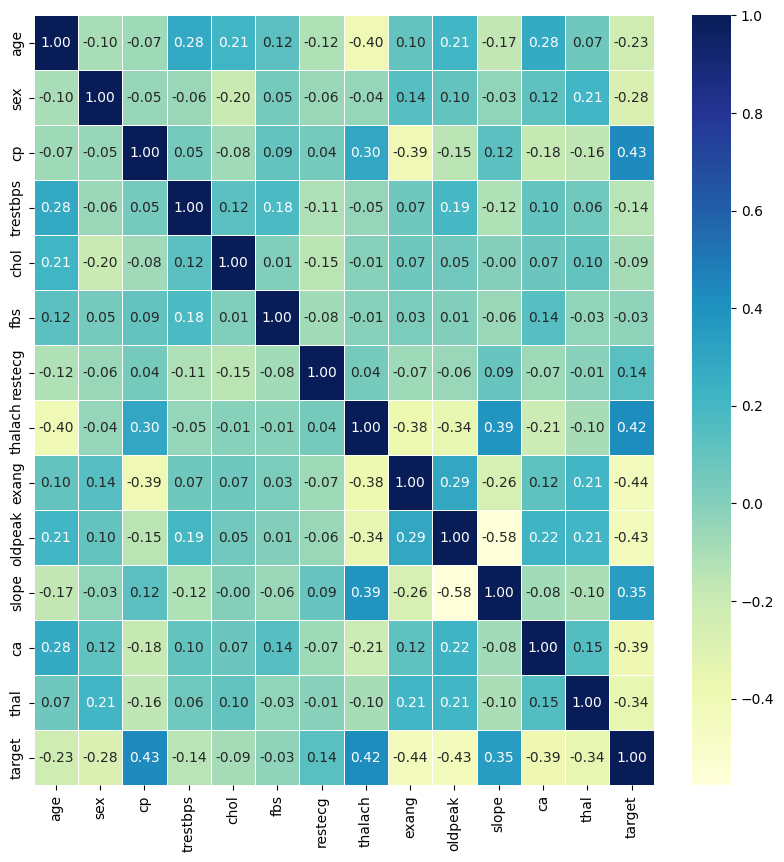

In [25]:
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap='YlGnBu');

In [26]:
## Modelling split the data
# df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [27]:
# Split into test and train data
# axis=1 : means drop entire column
x = df.drop('target', axis=1)
y = df['target']

In [28]:
# see value of x
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
# see value of y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# using Random seed, so that others could produce the same result
np.random.seed(7)
# Split into test and train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [31]:
len(x)

303

In [32]:
len(x_train)

242

In [33]:
242/303

0.7986798679867987

## Choosing the right model

The model we are going to use:

1-K Nearest Neighbors Classifier

2-Random Forest Classifier

3-Logistic Regression

In [34]:
# Putting the value into a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Logistic Regression':LogisticRegression()}
# def : is function
# fit_and_score : is model
# Random seed : for result reproduceble
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [35]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

c:\Users\Dell\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361,
 'Logistic Regression': 0.7377049180327869}

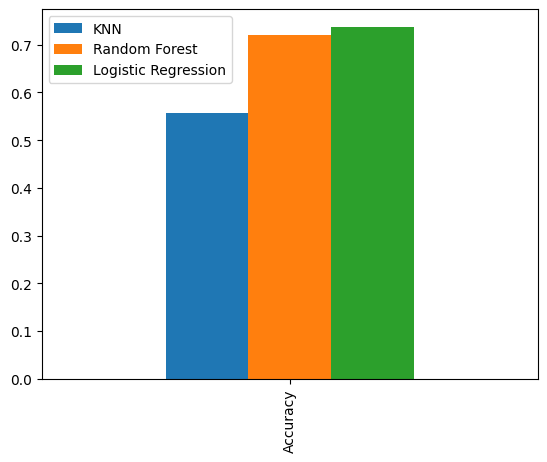

In [36]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar();

# Improving Model

### Universal Methods used for all Classification Problems

- Hyperparameter Tuning

- Features Improving # Touched yet


### Advanced Level

- Confusion_matrix

- cross_validation

- Precision

- Recall

- f1

- classification Report

- ROC Curve

- Hyperparameter Tuning

- Features Improving

In [37]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

In [38]:
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbors = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for the value
    KNN.fit(x_train,y_train)
    # Update the training score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))

In [39]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [40]:
test_score

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

### Plotting the Improve Model score

Max KNN Score:70.49%


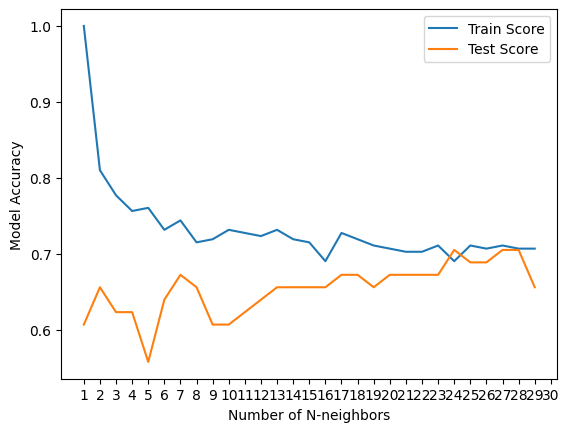

In [41]:
plt.plot(nneighbors,train_score, label='Train Score')
plt.plot(nneighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,31,1))
# Static beauty
plt.xlabel('Number of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend();
print(f'Max KNN Score:{max(test_score)*100:0.2f}%')

## Hyperparameter tuning using Randomized Search CV
- LogisticRegression()
- RandomForestClassifier()

In [42]:
# making the dictionary with and value
# log basically is power of 10
# log is used for capturing small variation
# log is inverse of exponent

LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

### hyperparameters for RandomForestClassifier

In [43]:
LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
RFC_hp = {
    'n_estimators':np.arange(10,1600,100),
    'max_depth':[None,3,5,6,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [44]:
np.random.seed(7)
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

### Runing the model with Hyperparemeters using GSCV

In [45]:
lr.score(x_test,y_test)

0.7540983606557377

In [46]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [47]:
# Tune Logistics Regression
np.random.seed(7)
# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,# n_iter = number of combination
                       verbose=True)

# Fit the random HP search model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

### Score Comparison tuning

In [48]:
rfc.score(x_test,y_test)
# below value after improvement of RandomForestClassifier

0.7049180327868853

In [49]:
rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

### Hyperparameters Tuning Using Grid Search CV

In [50]:
# tune Logistic Regression using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
lr_gs.score(x_test,y_test)

0.7540983606557377

In [52]:
lr_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [53]:
# Tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP
RFC2_hp = {
    'n_estimators':np.arange(1,101,50),
    'max_depth':[None,3,50],
    'min_samples_split':np.arange(2,8,2),
    'min_samples_leaf':np.arange(1,7,2)
}

rfc_gs = GridSearchCV(RandomForestClassifier(n_jobs=1),
                       param_grid=RFC2_hp,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
rfc_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [54]:
rfc_gs.score(x_test,y_test)

0.7377049180327869

In [55]:
 rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 51}

Improving and Tuning the Model
Universal Methods used for all Classification Problems

- Hyperparameter Tuning # Done

- Features Improving # not Touched yet

### Advanced Level

- ROC Curve

- Confusion_matrix

- cross_validation

- Precision

- Recall

- f1

- classification Report

### Area under the curve

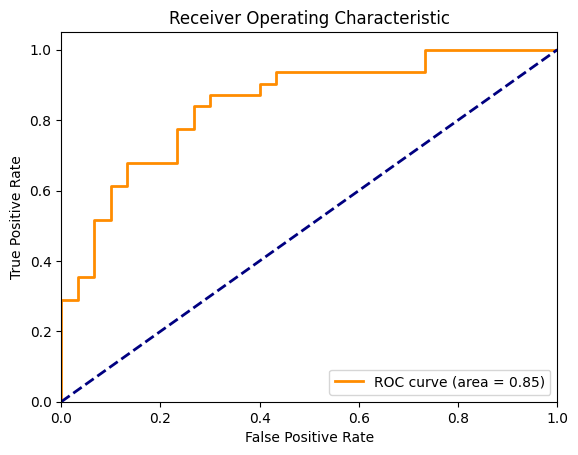

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming lr_gs is your trained logistic regression model
y_scores = lr_gs.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Confusion matrix


In [57]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions using a threshold
threshold = 0.5  # Example threshold
y_pred = (y_scores > threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18 12]
 [ 3 28]]


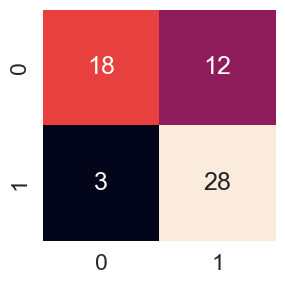

In [58]:
# Drawing heat map with confusion matrix

sns.set(font_scale=1.5)

def plot_confusion(y_test,y_pred):
    'This plot is the confusion matrix'

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot=True,
                    cbar=False)
plot_confusion(y_test,y_pred)

#### Plot the classification report
- In Classification we get one train data set

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



- Class_inbalance : salt in floor e.g: 1000 patient only 10 have heart disease find it
- Recall : maximium number of prediction cases must be in cluded in it.
- Precession : low (we you get maximum data of heart disease data wrong labelled as heart disease)
- f1 : is a combination of Recall and Precission
- Recall and Precission are inversely propotional

In [60]:
lr_gs.best_params_
# create instance
lr = LogisticRegression(C=0.615848211066026,
                       solver='liblinear')

In [61]:
# Cross validation Accuracy

cv_accuracy = cross_val_score(lr,
                             x,
                             y,
                             cv=7, # cv=135,it give best result
                             scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8284506191482934

In [62]:
# Cross validation precision
# precision value must be less than recall

cv_precision = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8108267922553637

In [63]:
# Cross validation recall

cv_recall = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.89648033126294

In [64]:
# Cross validation f1-score

cv_f1 = cross_val_score(lr,
                             x,
                             y,
                             cv=7,
                             scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8508447334977947

## Visualizing Cross Validation Score

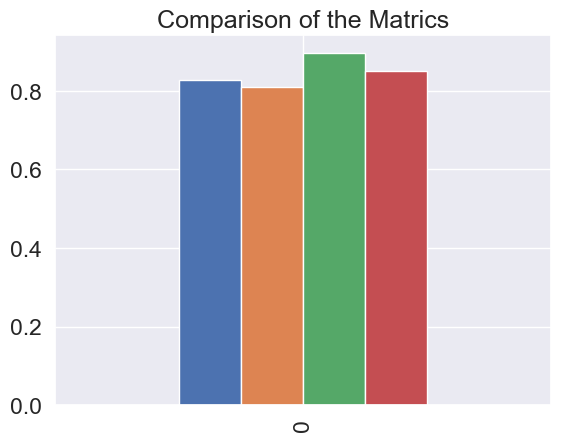

In [65]:
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'f1':cv_f1
},index=[0])
cv_plot.plot.bar(title='Comparison of the Matrics',
                legend=False);

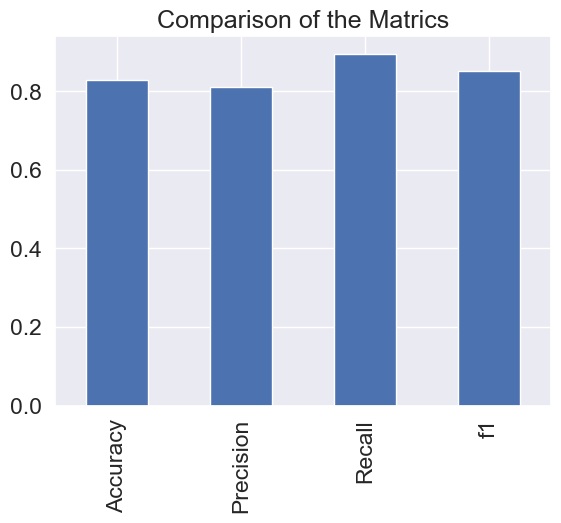

In [66]:
#1.2
cv_plot = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision':cv_precision,
    'Recall':cv_recall,
    'f1':cv_f1
},index=[0])
cv_plot.T.plot.bar(title='Comparison of the Matrics',
                legend=False);

### Features Improvement

In [67]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
lr.fit(x_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [69]:
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.02252678, -1.36972472,  0.79033601, -0.02405914, -0.00188849,
         0.45615731,  0.40549708,  0.03558521, -0.78346587, -0.56674308,
         0.52855363, -0.64573418, -1.10278199]])

In [70]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.02252678088859591,
 'sex': -1.3697247235123737,
 'cp': 0.790336009798431,
 'trestbps': -0.024059142708206346,
 'chol': -0.001888490478208966,
 'fbs': 0.45615730903073565,
 'restecg': 0.4054970774699765,
 'thalach': 0.03558520921757022,
 'exang': -0.7834658685604866,
 'oldpeak': -0.5667430774730721,
 'slope': 0.5285536289797753,
 'ca': -0.6457341797406612,
 'thal': -1.1027819922077673}

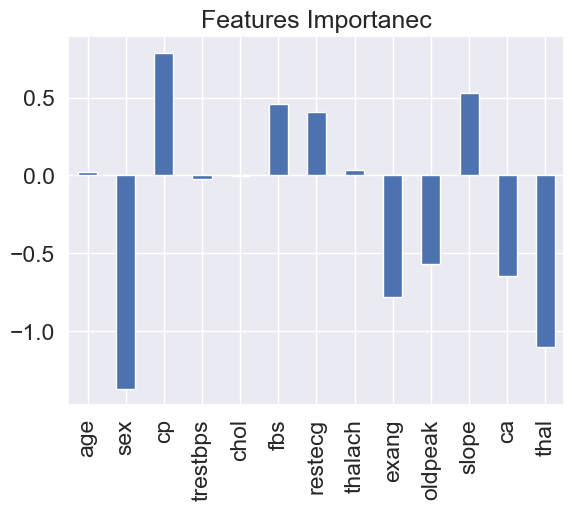

In [71]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title='Features Importanec', legend=False);